In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.cluster import KMeans
# import pygwalker as pyg
!pip install pyod --q
from pyod.models.ecod import ECOD
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
data = pd.read_csv('/content/CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# STEPS TAKEN
### - Clean Data
### - Remove outliers
### - Preprocess the data
### - Conduct kmeans
### - Apply dimensionality reduction to plot
### - Performance metrics
### - Apply other techniques for better modelling

In [3]:
# Clean Data
data.dropna(inplace = True)

In [4]:
# Remove Outlier
# Import ECOD (Empirical Cumulative Distribution Outlier Detection)
def outlierRemoval(dataframe):

    # initialize the ECOD
    sam = ECOD()

    #  Fit the ecod on the input dataframe
    sam.fit(dataframe)

    outliers = sam.predict(dataframe)

    dataframe["outliers"] = outliers

    # filter the dataframe to keep only inliers (where 'outliers') column is 0)
    dataframe = dataframe.loc[dataframe['outliers'] == 0 ]

    # drop the outliers column as it no longer needed
    dataframe.drop('outliers', axis = 1, inplace = True)


    # Printe the new dataframe
    print(dataframe.shape)

    return dataframe


In [5]:
Removed_outlier = outlierRemoval(data.drop('CUST_ID', axis = 1))
Removed_outlier.reset_index(inplace = True)
Removed_outlier

(7772, 17)


,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
4,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,8939,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6
7768,8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.000000,6
7769,8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.250000,6
7770,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6


In [6]:
# Preprocess The Data
df = Removed_outlier.drop('index', axis = 1).copy()
for i in df.columns:
    df[i] = PowerTransformer().fit_transform(df[[i]])


df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.314296,-1.264535,-0.385794,-0.976370,0.431838,-0.926625,-0.739041,-0.887458,-0.573846,-0.873528,-0.893449,-0.576963,-1.410398,-1.313514,-0.832835,-0.681923,0.407179
1,1.191160,-0.592596,-1.507657,-0.976370,-1.072649,1.440683,-1.275820,-0.887458,-0.991233,1.211840,1.123397,-1.384870,1.080929,1.649239,1.041378,1.236469,0.407179
2,0.979591,0.616766,0.618396,1.148066,-1.072649,-0.926625,1.252677,1.786249,-0.991233,-0.873528,-0.893449,0.566213,1.173182,-0.261180,0.588249,-0.681923,0.407179
3,0.155107,0.616766,-0.942429,0.057234,-1.072649,-0.926625,-0.998860,0.004036,-0.991233,-0.873528,-0.893449,-0.879847,-1.185854,-0.177562,-0.274250,-0.681923,0.407179
4,0.722739,0.616766,0.962455,-0.976370,1.324501,-0.926625,0.558381,-0.887458,0.851716,-0.873528,-0.893449,0.272330,-0.680003,0.537334,1.675836,-0.681923,0.407179


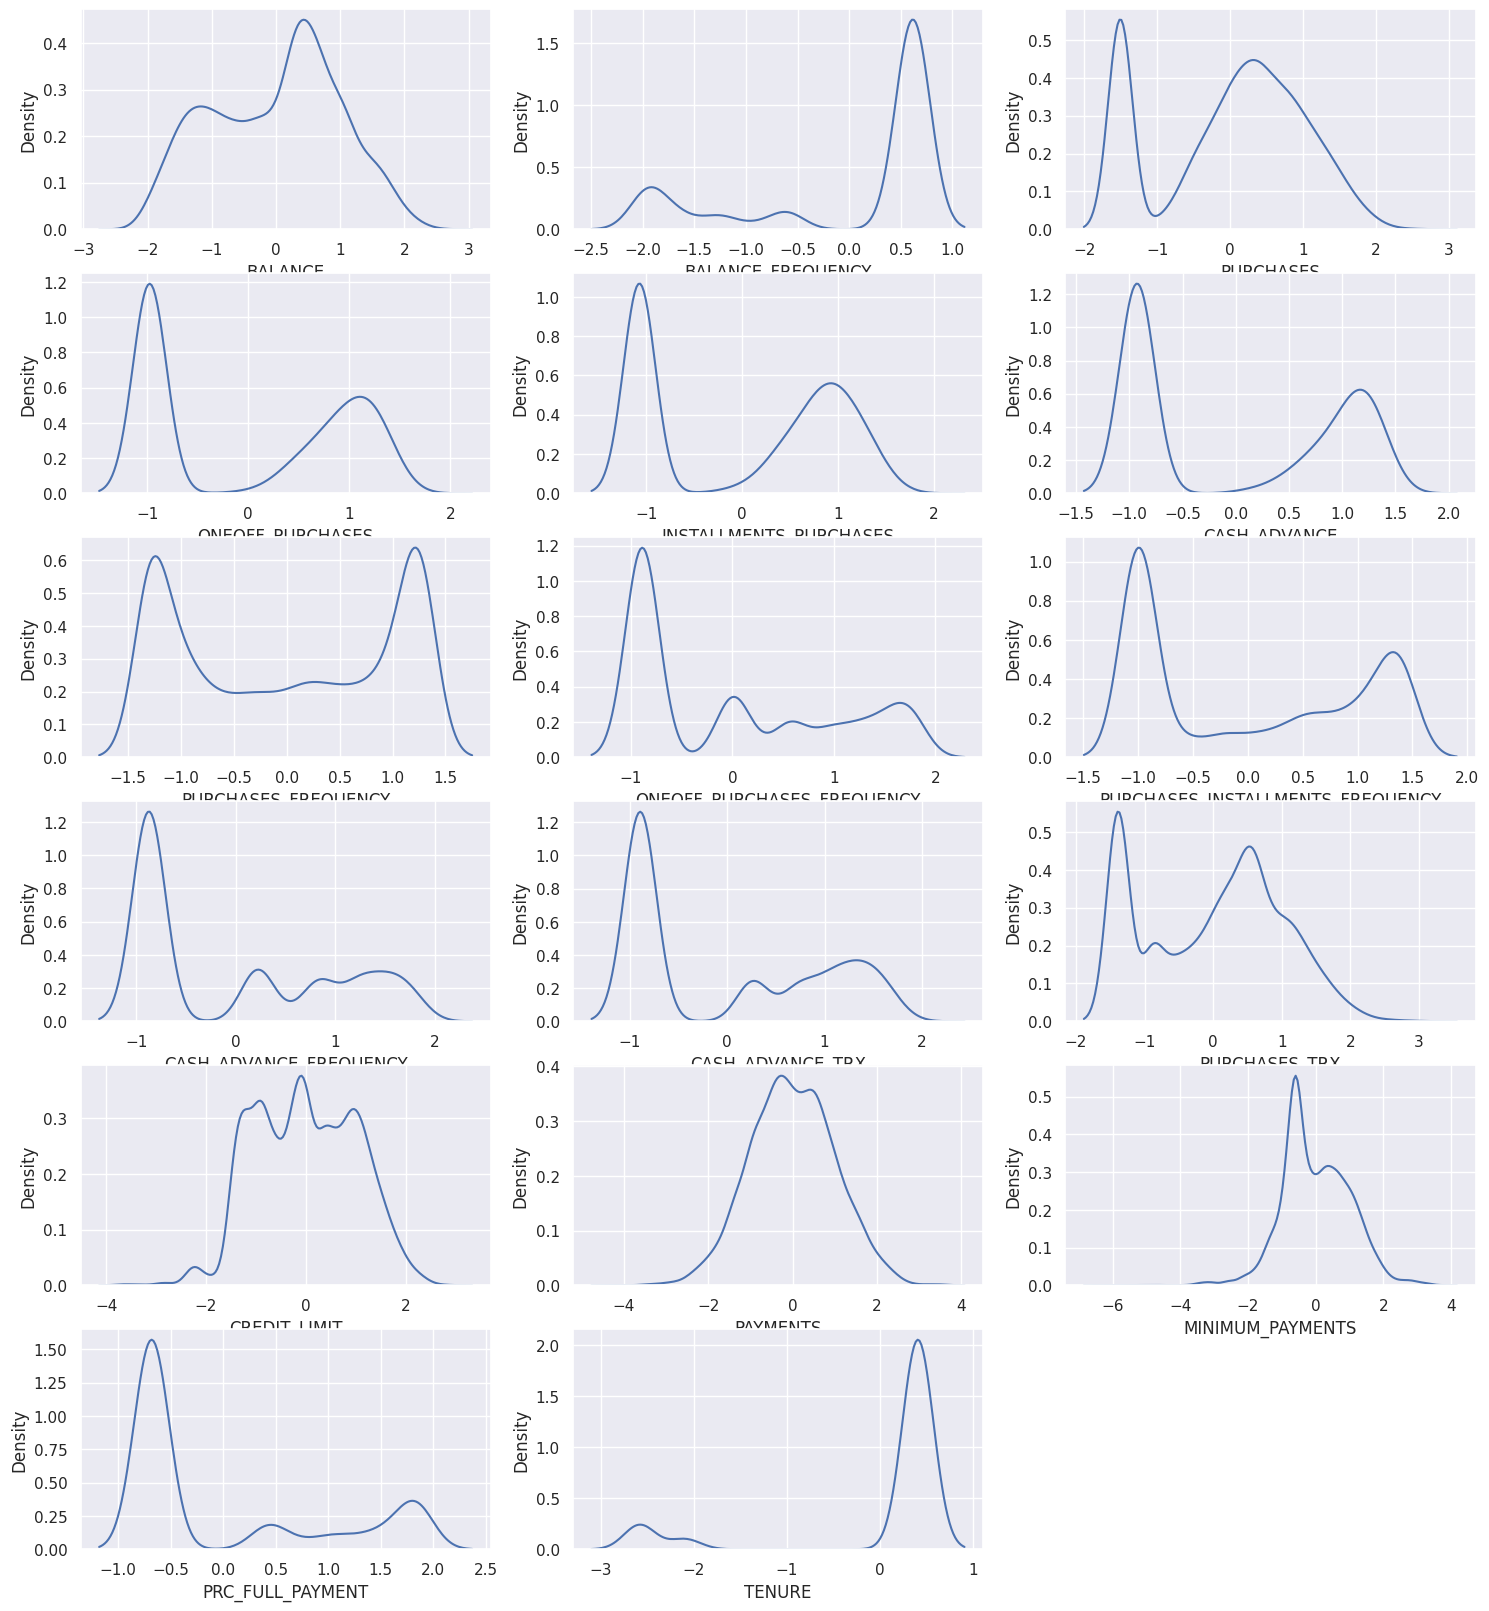

In [7]:
plt.figure(figsize=(18,20))
sns.set(style = 'darkgrid')
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 3, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)


# Dimensionality Reduction with Principal Component Analysis

Cumulative Variance is :
 [0.36893557 0.19774958 0.10982087 0.07812132 0.07129822 0.04783666
 0.03744932 0.03391947 0.0206281 ]

Total information captured: 
0.9657590966972193


,Decompose1,Decompose2,Decompose3,Decompose4,Decompose5,Decompose6,Decompose7,Decompose8,Decompose9
0,0.200702,-3.193733,-0.060158,-1.148750,0.308471,0.299544,-0.869233,-0.962094,-0.090190
1,-3.678672,0.516372,-0.047206,2.190858,1.609678,-0.375670,0.871730,-0.319070,0.650156
2,1.194246,1.813020,2.061557,-1.649795,0.557634,-0.561475,0.087201,0.757346,0.383036
3,-0.852028,-1.195397,1.073255,-1.995801,0.811057,0.442841,0.865474,-0.427881,-0.696375
4,1.254159,0.770045,-2.115563,-1.419727,0.998999,-0.652223,0.473292,-1.453115,0.122555


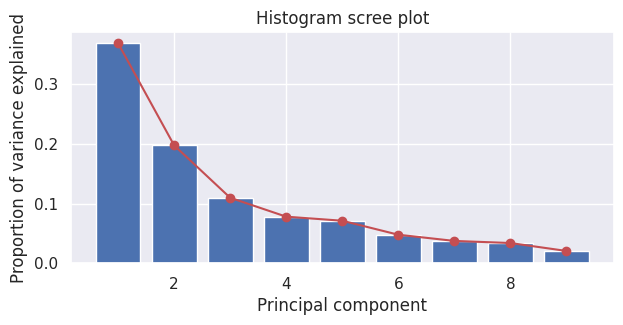

In [8]:
def dimensionReduce(features, num_component):
    from sklearn.decomposition import PCA # ............................. Import the PCA Algorithm
    x_pca = features # .................................................. Select the features to be Decomposed
    pca = PCA(n_components = num_component) # ........................... Instantiate PCA, and amount of information to be captured
    pca.fit(x_pca) # .................................................... Fit the PCA Algorithm on the selected features
    x_pca = pca.transform(x_pca) # ...................................... Transform the data
    frame_x_pca = pd.DataFrame(x_pca, columns= ['Decompose' + str(i + 1) for i in range(num_component)])

    # Find out how much information in the original dataset this dimensionality reduction covers
    cumulative_variance = pca.explained_variance_ratio_
    print(f"Cumulative Variance is :\n {cumulative_variance}")

    # Show the total variance explained by the newly created features
    print(f"\nTotal information captured: \n{sum([i for i in cumulative_variance])}")

    # Plot the Scree Plot to show the feature information
    sns.set(style = 'darkgrid')
    fig, ax = plt.subplots(figsize=(7, 3))
    ax.bar(range(1, int(x_pca.shape[1]) + 1), pca.explained_variance_ratio_)
    ax.plot(range(1, int(x_pca.shape[1]) +1), cumulative_variance, 'o-', color='r')
    plt.xlabel('Principal component')
    plt.ylabel('Proportion of variance explained')
    plt.title('Histogram scree plot')
    return frame_x_pca

dx = df.copy()
# We reduce the dimensionality of only the numerical features
pca_data = dimensionReduce(dx, 9)
pca_data.head()

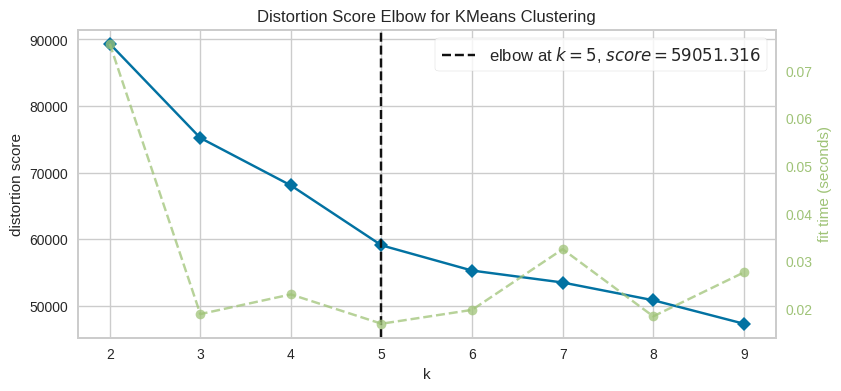

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Ascertain Optimal Number of Clusters

from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize = (9, 4))
# Instantiate the clustering model and visualizer
km = KMeans(init="k-means++", random_state=0, n_init="auto")
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(pca_data)
visualizer.show()

In [10]:
km = KMeans(n_clusters = 5,
            init = 'k-means++',
            n_init = 10,
            max_iter = 100,
            random_state = 45)

clusters_predict = km.fit_predict(pca_data)
pca_data['Clusters'] = clusters_predict
pca_data.head()

,Decompose1,Decompose2,Decompose3,Decompose4,Decompose5,Decompose6,Decompose7,Decompose8,Decompose9,Clusters
0,0.200702,-3.193733,-0.060158,-1.148750,0.308471,0.299544,-0.869233,-0.962094,-0.090190,2
1,-3.678672,0.516372,-0.047206,2.190858,1.609678,-0.375670,0.871730,-0.319070,0.650156,3
2,1.194246,1.813020,2.061557,-1.649795,0.557634,-0.561475,0.087201,0.757346,0.383036,4
3,-0.852028,-1.195397,1.073255,-1.995801,0.811057,0.442841,0.865474,-0.427881,-0.696375,0
4,1.254159,0.770045,-2.115563,-1.419727,0.998999,-0.652223,0.473292,-1.453115,0.122555,2


In [11]:
# Using Metrics to evaluate the performance of the clusters Algorithm
print(f"Davies bouldin score: {davies_bouldin_score(pca_data,pca_data['Clusters'])}")
print(f"Calinski Score: {calinski_harabasz_score(pca_data,pca_data['Clusters'])}")
print(f"Silhouette Score: {silhouette_score(pca_data,pca_data['Clusters'])}")

Davies bouldin score: 1.2677514530224816
Calinski Score: 2695.2495665159163
Silhouette Score: 0.32579878688673114


In [12]:
# Creating a Function for 3D or 2D visuals for metrics

def plotter(df, expected_features = 3, opacity=0.8, width_line=0.1):
    df = df.astype({"Clusters": "object"})
    df = df.sort_values("Clusters")

    if expected_features == 3:
        fig = px.scatter_3d(
            df,
            x='Decompose1',
            y='Decompose2',
            z='Decompose3',
            color='Clusters',
            template="plotly",
            color_discrete_sequence=px.colors.qualitative.Vivid,
            title = f"{expected_features}D PCA SPACE"
        )
        fig.update_traces(
            marker={
                "size": 4,
                "opacity": opacity,
                "line": {
                    "width": width_line,
                    "color": "black",
                }
            }
        ).update_layout(
            width=1300,
            height =800,
            autosize=True,
            showlegend=True
        )

    elif expected_features == 2:
        fig = px.scatter(
            df,
            x='Decompose1',
            y='Decompose2',
            color='Clusters',
            template="plotly",
            color_discrete_sequence=px.colors.qualitative.Vivid,
            title = f"{expected_features}D PCA SPACE"
        )

    fig.show()

Cumulative Variance is :
 [0.3457145  0.1877845  0.12234786]

Total information captured: 
0.6558468593580881


,Decompose1,Decompose2,Decompose3
0,0.207445,-3.185985,-0.272974
1,-3.692514,0.696974,-0.936290
2,1.169328,2.007902,0.612196
3,-0.819805,-1.590455,1.999379
4,1.252404,0.834703,-1.374888


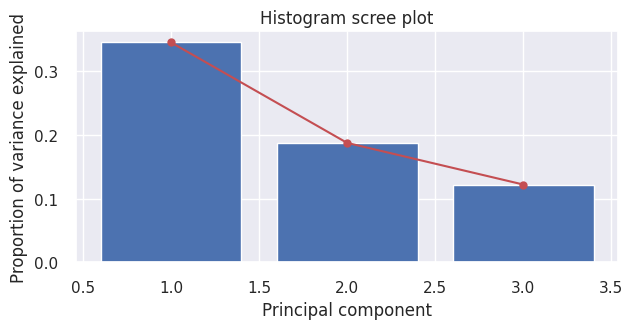

In [13]:
# Conducting Dimensionality reduction to 3D for ease of visualization
visual_3D_data = dimensionReduce(pca_data, 3)
visual_3D_data.head()

In [14]:
# Plotting the dimensionally reduced data
visual_3D_data['Clusters'] = clusters_predict
plotter(visual_3D_data, expected_features = 3, opacity=0.8, width_line = 0.1)

Cumulative Variance is :
 [0.3457145 0.1877845]

Total information captured: 
0.5334989968506778


,Decompose1,Decompose2
0,0.207445,-3.185985
1,-3.692514,0.696974
2,1.169328,2.007902
3,-0.819805,-1.590455
4,1.252404,0.834703


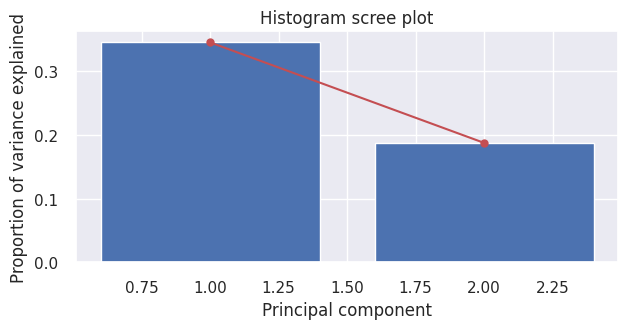

In [15]:
# Conducting Dimensionality reduction to 3D for ease of visualization
visual_data_2D = dimensionReduce(pca_data, 2)
visual_data_2D.head()

In [16]:
# Plotting the dimensionally reduced data

visual_data_2D['Clusters'] = clusters_predict
plotter(visual_data_2D, expected_features = 2, opacity=0.8, width_line = 0.1)


In [17]:
processed_data = pca_data.copy()
processed_data['index'] = Removed_outlier['index']
interprete = pd.merge(Removed_outlier, processed_data[['Clusters', 'index']], on = 'index', how = 'left' )
interprete = pd.merge(interprete, data['CUST_ID'].reset_index(), how = 'left', on = 'index')
# interprete.drop('index', axis = 1, inplace = True)
interprete

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters,CUST_ID
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,C10001
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3,C10002
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4,C10003
3,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,C10005
4,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2,C10006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,8939,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.000000,6,0,C19180
7768,8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.000000,6,2,C19181
7769,8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.250000,6,2,C19183
7770,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2,C19186


In [18]:
# split into train and test
sel = interprete.drop(['index', 'Clusters',	'CUST_ID'], axis = 1)
y = interprete.Clusters

x_train, x_test, y_train, y_test = train_test_split(sel, y, test_size = 0.15, random_state = 45, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (6606, 17)
x_test: (1166, 17)
y_train: (6606,)
y_test: (1166,)


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       169
           1       0.99      0.94      0.96       204
           2       0.97      0.97      0.97       265
           3       0.98      0.99      0.98       322
           4       0.96      0.95      0.95       206

    accuracy                           0.96      1166
   macro avg       0.96      0.96      0.96      1166
weighted avg       0.97      0.96      0.96      1166



<Axes: >

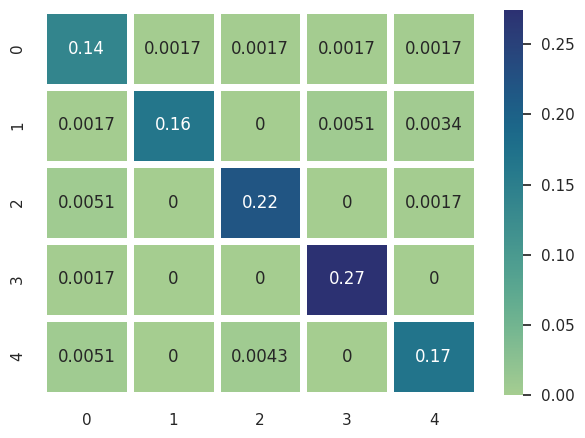

In [19]:
# SUPERVISED MODELLING
from sklearn.ensemble import RandomForestClassifier
ref = RandomForestClassifier()
ref.fit(x_train, y_train)
validate = ref.predict(x_test)
print(classification_report(validate, y_test))

from sklearn.metrics import confusion_matrix
revealer = confusion_matrix(validate, y_test)
plt.figure(figsize = (7,5))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [20]:
# Predicting the cluster of a new customer
test_cust = data.loc[data['CUST_ID'] == 'C19186']
test_cust = test_cust[x_train.columns]
predicted_cluster = ref.predict(test_cust)
print(f"The new customer is predicted to be among the cluster class of {predicted_cluster}")

The new customer is predicted to be among the cluster class of [2]
